## Housind Data Cleaning & Processing

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [129]:
housing_data = pd.read_csv('House_Sales.csv')

In [130]:
housing_data.head()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1


In [131]:
# Drop the non-beneficial columns
housing_df = housing_data.drop(columns = ['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])
housing_df

,REF_DATE,GEO,New housing price indexes,VALUE
0,1981-01,Canada,Total (house and land),38.2
1,1981-01,Canada,House only,36.1
2,1981-01,Canada,Land only,40.6
3,1981-01,Atlantic Region,Total (house and land),NaN
4,1981-01,Atlantic Region,House only,NaN
...,...,...,...,...
61435,2023-08,"Vancouver, British Columbia",House only,127.6
61436,2023-08,"Vancouver, British Columbia",Land only,122.1
61437,2023-08,"Victoria, British Columbia",Total (house and land),120.7
61438,2023-08,"Victoria, British Columbia",House only,126.5


In [134]:
housing_df[['Year', 'Month']] = housing_df['REF_DATE'].str.split('-', expand=True)
housing_df.drop(['REF_DATE', 'Month'], axis=1, inplace=True)

In [135]:
housing_df

,GEO,New housing price indexes,VALUE,Year
0,Canada,Total (house and land),38.2,1981
1,Canada,House only,36.1,1981
2,Canada,Land only,40.6,1981
3,Atlantic Region,Total (house and land),NaN,1981
4,Atlantic Region,House only,NaN,1981
...,...,...,...,...
61435,"Vancouver, British Columbia",House only,127.6,2023
61436,"Vancouver, British Columbia",Land only,122.1,2023
61437,"Victoria, British Columbia",Total (house and land),120.7,2023
61438,"Victoria, British Columbia",House only,126.5,2023


In [177]:
housing_df.rename(columns = {'Year':'REF_DATE'}, inplace = True)

In [178]:
housing_df

,GEO,New housing price indexes,VALUE,REF_DATE
0,Canada,Total (house and land),38.2,1981
1,Canada,House only,36.1,1981
2,Canada,Land only,40.6,1981
9,"St. John's, Newfoundland and Labrador",Total (house and land),36.1,1981
10,"St. John's, Newfoundland and Labrador",House only,37.5,1981
...,...,...,...,...
61435,"Vancouver, British Columbia",House only,127.6,2023
61436,"Vancouver, British Columbia",Land only,122.1,2023
61437,"Victoria, British Columbia",Total (house and land),120.7,2023
61438,"Victoria, British Columbia",House only,126.5,2023


In [179]:
column_names=housing_df.columns
column_names

Index(['GEO', 'New housing price indexes', 'VALUE', 'REF_DATE'], dtype='object')

In [180]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50614 entries, 0 to 61439
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GEO                        50614 non-null  object 
 1   New housing price indexes  50614 non-null  object 
 2   VALUE                      50614 non-null  float64
 3   REF_DATE                   50614 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [181]:
housing_df.dropna(inplace=True)

In [182]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50614 entries, 0 to 61439
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GEO                        50614 non-null  object 
 1   New housing price indexes  50614 non-null  object 
 2   VALUE                      50614 non-null  float64
 3   REF_DATE                   50614 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.9+ MB


In [205]:
housing_df.to_csv('housing_dataset_clean_oct_11.csv')

## Merge Housing & Immigration Dataframes 

In [260]:
immigration_df = pd.read_csv('immigration_dataset_clean_oct_10.csv')

In [261]:
housing_df

,GEO,New housing price indexes,VALUE,REF_DATE
0,Canada,Total (house and land),38.2,1981
1,Canada,House only,36.1,1981
2,Canada,Land only,40.6,1981
9,"St. John's, Newfoundland and Labrador",Total (house and land),36.1,1981
10,"St. John's, Newfoundland and Labrador",House only,37.5,1981
...,...,...,...,...
61435,"Vancouver, British Columbia",House only,127.6,2023
61436,"Vancouver, British Columbia",Land only,122.1,2023
61437,"Victoria, British Columbia",Total (house and land),120.7,2023
61438,"Victoria, British Columbia",House only,126.5,2023


In [262]:
immigration_df

,Unnamed: 0,REF_DATE,GEO,value,status_year
0,0,2021,"Abbotsford - Mission (CMA), B.C.",3378477,1980
1,1,2021,Alberta,49350279,1980
2,2,2021,"Barrie (CMA), Ont.",3960250,1980
3,3,2021,"Belleville - Quinte West (CMA), Ont.",1538001,1980
4,4,2021,"Brantford (CMA), Ont.",2680709,1980
...,...,...,...,...,...
331,331,2021,"Vancouver (CMA), B.C.",28621544,2021
332,332,2021,"Victoria (CMA), B.C.",1863189,2021
333,333,2021,"Windsor (CMA), Ont.",2992476,2021
334,334,2021,"Winnipeg (CMA), Man.",8392093,2021


In [263]:
immigration_df.drop('Unnamed: 0', axis=1, inplace=True)
immigration_df.drop('REF_DATE', axis=1, inplace=True)

In [264]:
immigration_df.rename(columns = {'value':'immigrants_total', 'status_year':'REF_DATE'}, inplace = True)

In [265]:
immigration_df

,GEO,immigrants_total,REF_DATE
0,"Abbotsford - Mission (CMA), B.C.",3378477,1980
1,Alberta,49350279,1980
2,"Barrie (CMA), Ont.",3960250,1980
3,"Belleville - Quinte West (CMA), Ont.",1538001,1980
4,"Brantford (CMA), Ont.",2680709,1980
...,...,...,...
331,"Vancouver (CMA), B.C.",28621544,2021
332,"Victoria (CMA), B.C.",1863189,2021
333,"Windsor (CMA), Ont.",2992476,2021
334,"Winnipeg (CMA), Man.",8392093,2021


In [266]:
immigration_df['REF_DATE']=immigration_df['REF_DATE'].astype(int)
housing_df['REF_DATE']=housing_df['REF_DATE'].astype(int)

In [267]:
merged_df = housing_df.merge(immigration_df, on=['GEO', 'REF_DATE'], suffixes=('_left', '_right'))
merged_df

,GEO,New housing price indexes,VALUE,REF_DATE,immigrants_total
0,Newfoundland and Labrador,Total (house and land),45.4,1990,327448
1,Newfoundland and Labrador,House only,46.7,1990,327448
2,Newfoundland and Labrador,Land only,40.6,1990,327448
3,Newfoundland and Labrador,Total (house and land),45.4,1990,327448
4,Newfoundland and Labrador,House only,46.7,1990,327448
...,...,...,...,...,...
1759,British Columbia,House only,123.7,2021,36371910
1760,British Columbia,Land only,117.8,2021,36371910
1761,British Columbia,Total (house and land),124.1,2021,36371910
1762,British Columbia,House only,123.9,2021,36371910


In [268]:
merged_df.to_csv('merged_df.csv')

## Using pd.get_dummies to hot encode GEO locations

In [269]:
# Get one hot encoding of columns B
index_df = pd.get_dummies(merged_df['GEO'])
# Drop column B as it is now encoded
merged_dummies = merged_df.drop('GEO',axis = 1)
# Join the encoded df
merged_dummies = merged_dummies.join(index_df)
merged_dummies

,New housing price indexes,VALUE,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,Total (house and land),45.4,1990,327448,0,0,0,0,1,0,0,0,0,0
1,House only,46.7,1990,327448,0,0,0,0,1,0,0,0,0,0
2,Land only,40.6,1990,327448,0,0,0,0,1,0,0,0,0,0
3,Total (house and land),45.4,1990,327448,0,0,0,0,1,0,0,0,0,0
4,House only,46.7,1990,327448,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,House only,123.7,2021,36371910,0,1,0,0,0,0,0,0,0,0
1760,Land only,117.8,2021,36371910,0,1,0,0,0,0,0,0,0,0
1761,Total (house and land),124.1,2021,36371910,0,1,0,0,0,0,0,0,0,0
1762,House only,123.9,2021,36371910,0,1,0,0,0,0,0,0,0,0


In [270]:
# Get one hot encoding of columns B
index_df = pd.get_dummies(merged_dummies['New housing price indexes'])
# Drop column B as it is now encoded
merged_dummies = merged_dummies.drop('New housing price indexes',axis = 1)
# Join the encoded df
merged_dummies = merged_dummies.join(index_df)
merged_dummies

,VALUE,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land)
0,45.4,1990,327448,0,0,0,0,1,0,0,0,0,0,0,0,1
1,46.7,1990,327448,0,0,0,0,1,0,0,0,0,0,1,0,0
2,40.6,1990,327448,0,0,0,0,1,0,0,0,0,0,0,1,0
3,45.4,1990,327448,0,0,0,0,1,0,0,0,0,0,0,0,1
4,46.7,1990,327448,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,123.7,2021,36371910,0,1,0,0,0,0,0,0,0,0,1,0,0
1760,117.8,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,1,0
1761,124.1,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,0,1
1762,123.9,2021,36371910,0,1,0,0,0,0,0,0,0,0,1,0,0


In [271]:
column_names=merged_dummies.columns
column_names

Index(['VALUE', 'REF_DATE', 'immigrants_total', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan',
       'House only', 'Land only', 'Total (house and land)'],
      dtype='object')

In [272]:
merged_dummies.to_csv('complete_data_dummies.csv')

## Splitting Data for Model Training 

In [207]:
from sklearn.model_selection import train_test_split

X = housing_data.drop(['VALUE'], axis=1)
y = housing_data['VALUE']

In [208]:
X

,REF_DATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land)
0,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1981,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10,1981,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61435,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
61436,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
61437,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
61438,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [209]:
y

0         38.2
1         36.1
2         40.6
9         36.1
10        37.5
         ...  
61435    127.6
61436    122.1
61437    120.7
61438    126.5
61439    109.8
Name: VALUE, Length: 50614, dtype: float64

In [210]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=355)

In [211]:
train_data = X_train.join(y_train)

In [212]:
train_data.sort_values('REF_DATE', inplace=True)

<Axes: xlabel='REF_DATE'>

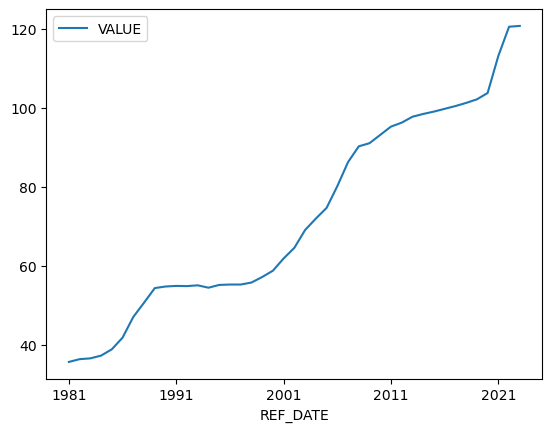

In [213]:
train_data[['REF_DATE', 'VALUE']].groupby('REF_DATE').median('VALUE').plot()

In [214]:
train_data['REF_DATE']=train_data['REF_DATE'].astype(int)

In [215]:
train_data

,REF_DATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),VALUE
292,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,31.9
313,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,28.2
1196,1981,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,78.0
863,1981,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,32.5
182,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60918,2023,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,121.4
61228,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,121.1
60910,2023,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,132.7
60771,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,173.4


In [216]:
median_house_price_by_year = train_data.groupby('REF_DATE')['VALUE'].median().reset_index()

In [217]:
median_house_price_by_year

,REF_DATE,VALUE
0,1981,35.60
1,1982,36.30
2,1983,36.50
3,1984,37.20
4,1985,38.80
5,1986,41.75
6,1987,47.00
7,1988,50.60
8,1989,54.30
9,1990,54.70


In [306]:
median_house_price_by_year.to_csv('median_house_price_by_year.csv')

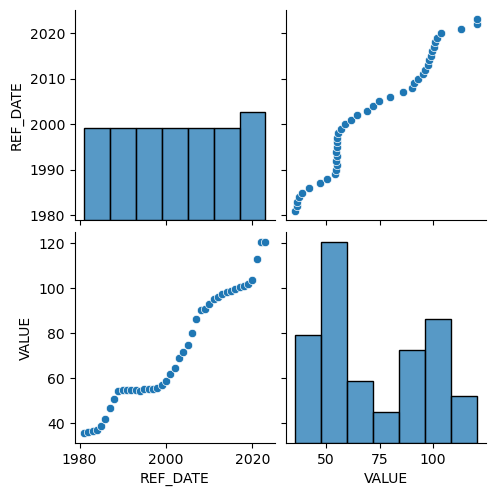

In [218]:
sns.pairplot(median_house_price_by_year)
plt.show()

array([[<Axes: title={'center': 'REF_DATE'}>,
        <Axes: title={'center': 'Alberta'}>,
        <Axes: title={'center': 'Atlantic Region'}>,
        <Axes: title={'center': 'British Columbia'}>,
        <Axes: title={'center': 'Calgary, Alberta'}>,
        <Axes: title={'center': 'Charlottetown, Prince Edward Island'}>,
        <Axes: title={'center': 'Edmonton, Alberta'}>],
       [<Axes: title={'center': 'Greater Sudbury, Ontario'}>,
        <Axes: title={'center': 'Guelph, Ontario'}>,
        <Axes: title={'center': 'Halifax, Nova Scotia'}>,
        <Axes: title={'center': 'Hamilton, Ontario'}>,
        <Axes: title={'center': 'Kelowna, British Columbia'}>,
        <Axes: title={'center': 'Kitchener-Cambridge-Waterloo, Ontario'}>,
        <Axes: title={'center': 'London, Ontario'}>],
       [<Axes: title={'center': 'Manitoba'}>,
        <Axes: title={'center': 'Montréal, Quebec'}>,
        <Axes: title={'center': 'New Brunswick'}>,
        <Axes: title={'center': 'Newfoundland an

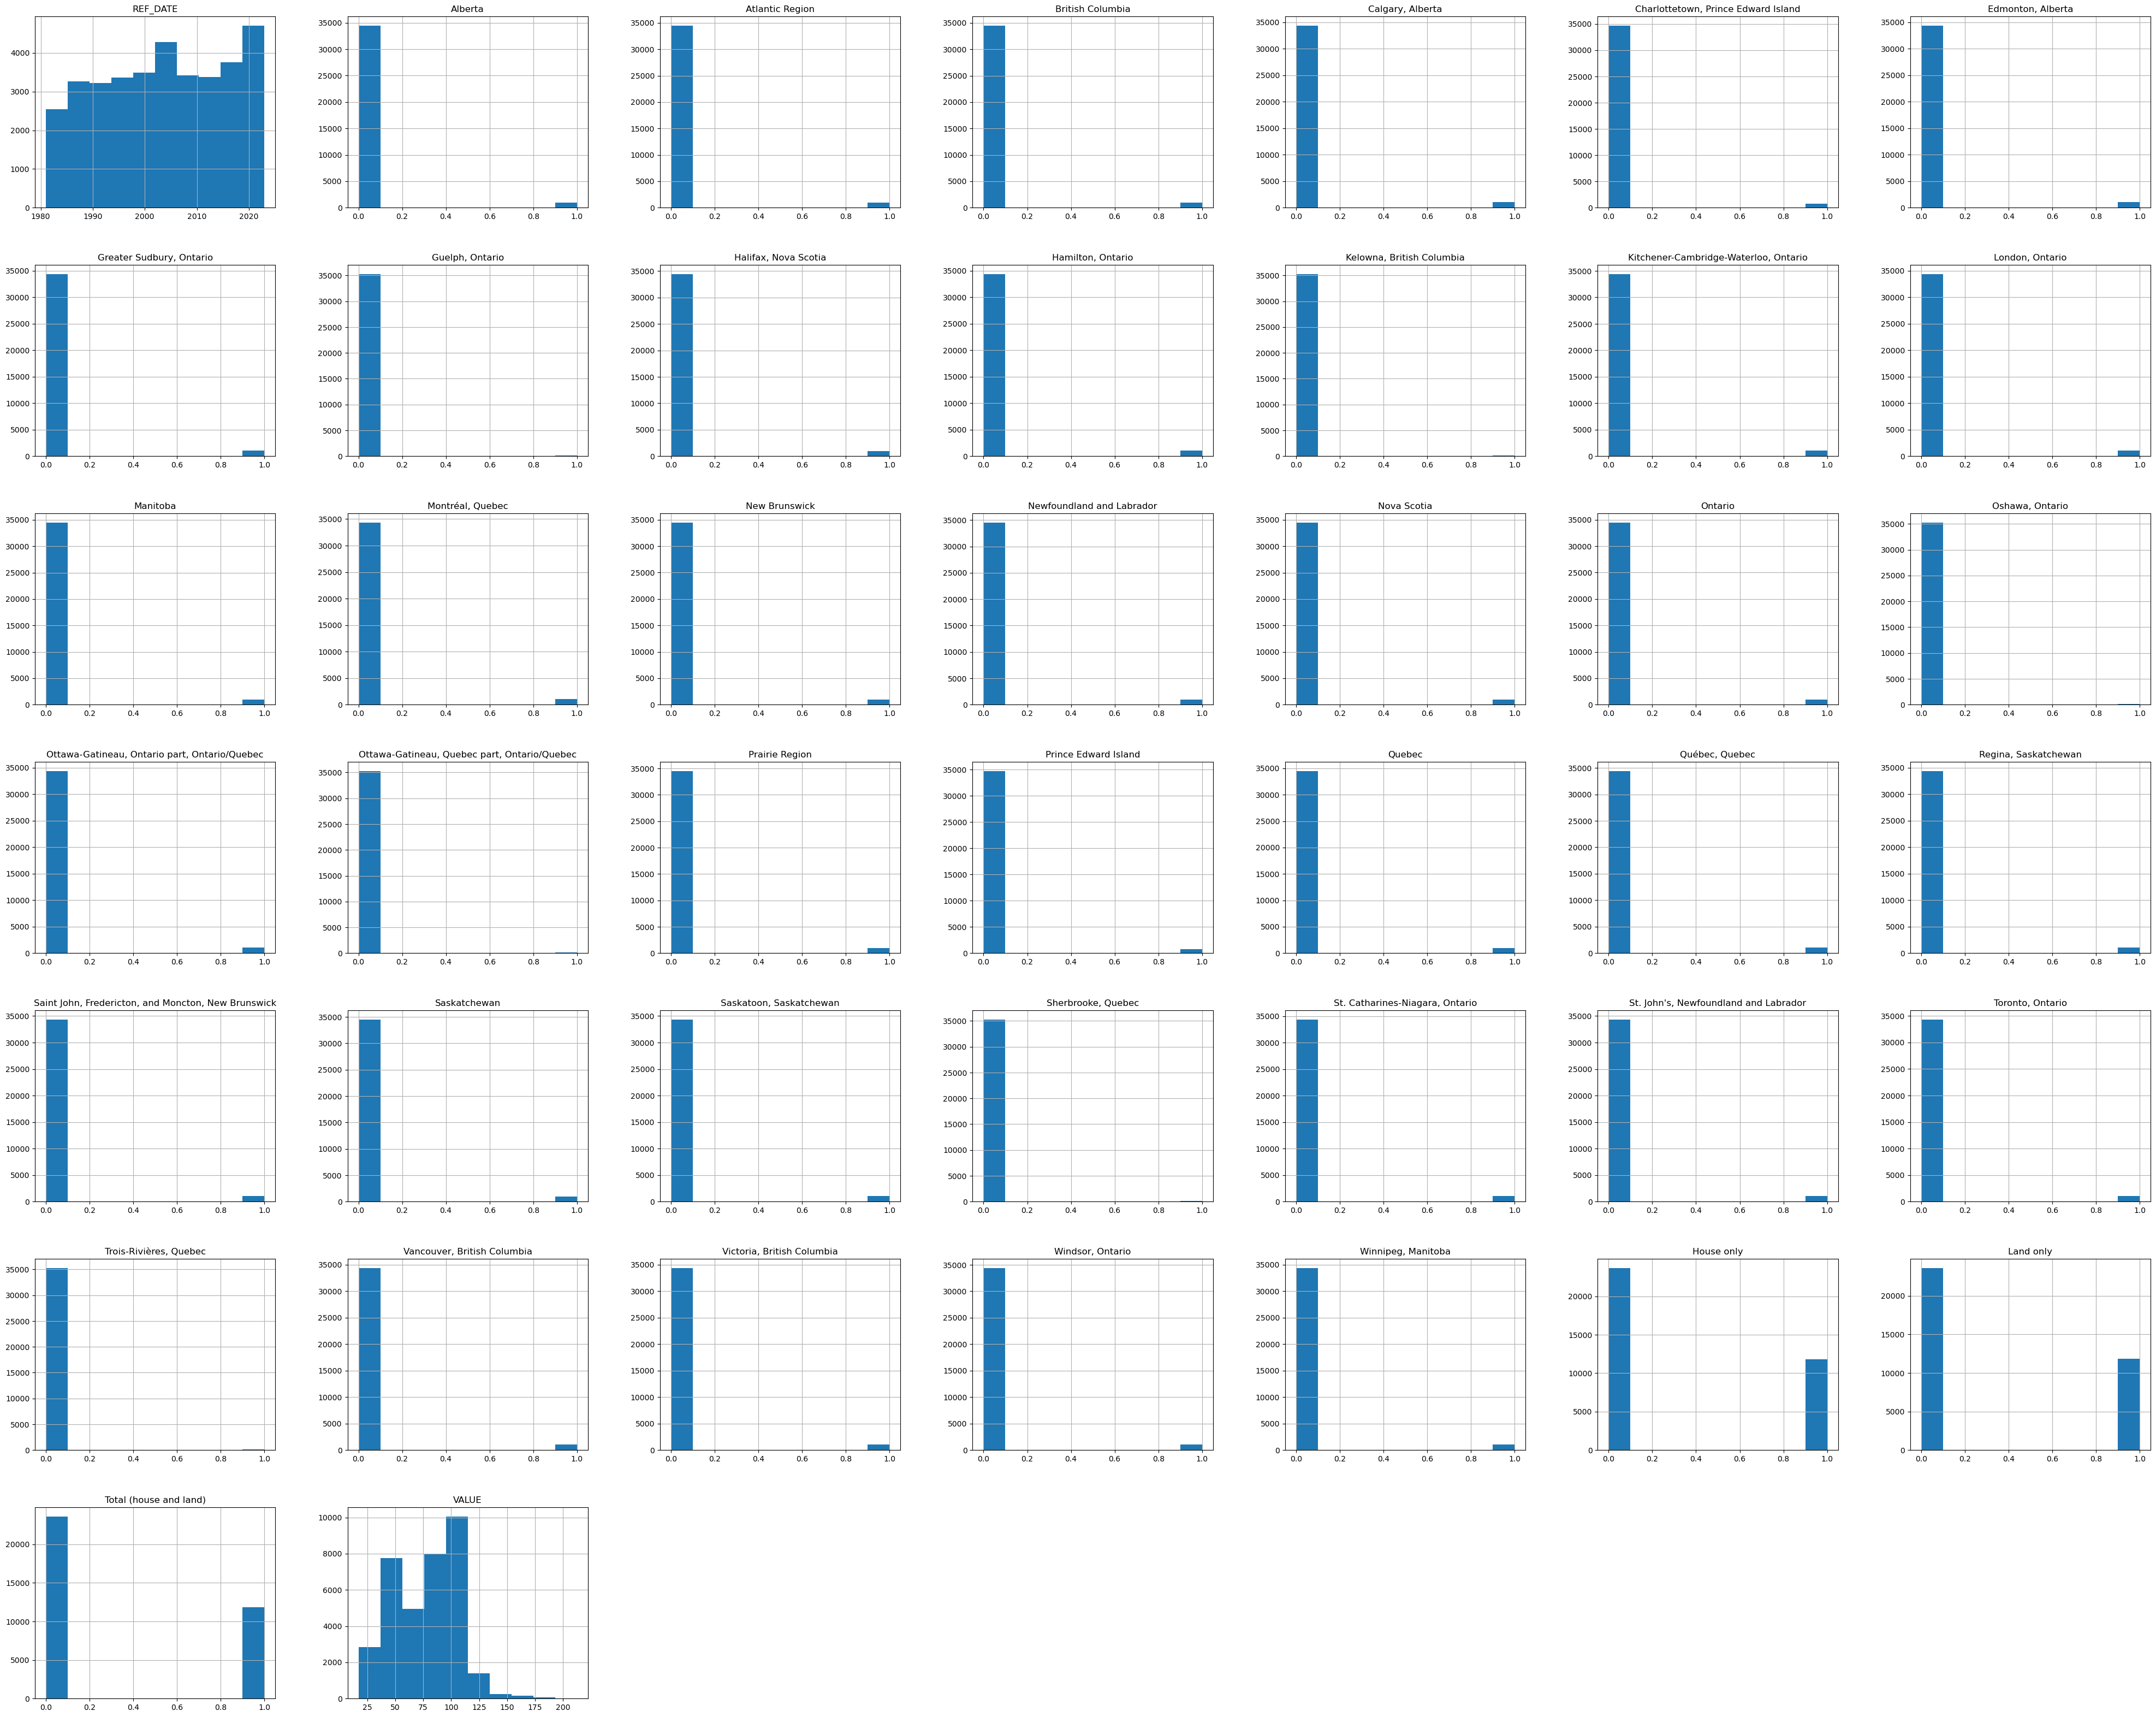

In [219]:
train_data.hist(figsize=(50,40))

In [220]:
train_data.corr()

,REF_DATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),VALUE
REF_DATE,1.000000,0.015951,0.009625,0.011747,-0.024184,0.064372,-0.022288,-0.028812,0.095038,-0.005465,...,-0.027974,0.092656,-0.021310,-0.020275,-0.025733,-0.022137,0.003629,-0.003355,-0.000269,0.802022
Alberta,0.015951,1.000000,-0.028028,-0.028043,-0.029574,-0.024782,-0.029988,-0.029617,-0.011624,-0.028685,...,-0.030257,-0.011519,-0.029832,-0.029646,-0.029372,-0.029545,0.001274,-0.002196,0.000922,-0.052719
Atlantic Region,0.009625,-0.028028,1.000000,-0.027717,-0.029230,-0.024493,-0.029639,-0.029272,-0.011488,-0.028351,...,-0.029905,-0.011385,-0.029485,-0.029301,-0.029030,-0.029201,0.003253,-0.003573,0.000324,0.002701
British Columbia,0.011747,-0.028043,-0.027717,1.000000,-0.029245,-0.024507,-0.029655,-0.029288,-0.011495,-0.028366,...,-0.029921,-0.011391,-0.029500,-0.029317,-0.029046,-0.029217,-0.001680,-0.001477,0.003154,0.087111
"Calgary, Alberta",-0.024184,-0.029574,-0.029230,-0.029245,1.000000,-0.025844,-0.031274,-0.030887,-0.012122,-0.029915,...,-0.031554,-0.012013,-0.031111,-0.030917,-0.030631,-0.030812,0.004542,-0.000247,-0.004289,-0.107445
"Charlottetown, Prince Edward Island",0.064372,-0.024782,-0.024493,-0.024507,-0.025844,1.000000,-0.026206,-0.025882,-0.010158,-0.025067,...,-0.026441,-0.010066,-0.026069,-0.025907,-0.025668,-0.025819,0.001061,0.000168,-0.001228,0.087434
"Edmonton, Alberta",-0.022288,-0.029988,-0.029639,-0.029655,-0.031274,-0.026206,1.000000,-0.031320,-0.012292,-0.030334,...,-0.031997,-0.012181,-0.031547,-0.031350,-0.031060,-0.031244,0.005653,-0.007067,0.001421,-0.061712
"Greater Sudbury, Ontario",-0.028812,-0.029617,-0.029272,-0.029288,-0.030887,-0.025882,-0.031320,1.000000,-0.012140,-0.029958,...,-0.031600,-0.012030,-0.031156,-0.030962,-0.030676,-0.030857,-0.001786,-0.002703,0.004485,0.058574
"Guelph, Ontario",0.095038,-0.011624,-0.011488,-0.011495,-0.012122,-0.010158,-0.012292,-0.012140,1.000000,-0.011758,...,-0.012402,-0.004722,-0.012228,-0.012152,-0.012039,-0.012110,0.001045,0.001692,-0.002734,0.089449
"Halifax, Nova Scotia",-0.005465,-0.028685,-0.028351,-0.028366,-0.029915,-0.025067,-0.030334,-0.029958,-0.011758,1.000000,...,-0.030606,-0.011652,-0.030175,-0.029987,-0.029710,-0.029886,-0.006815,0.002406,0.004400,0.000209


<Axes: >

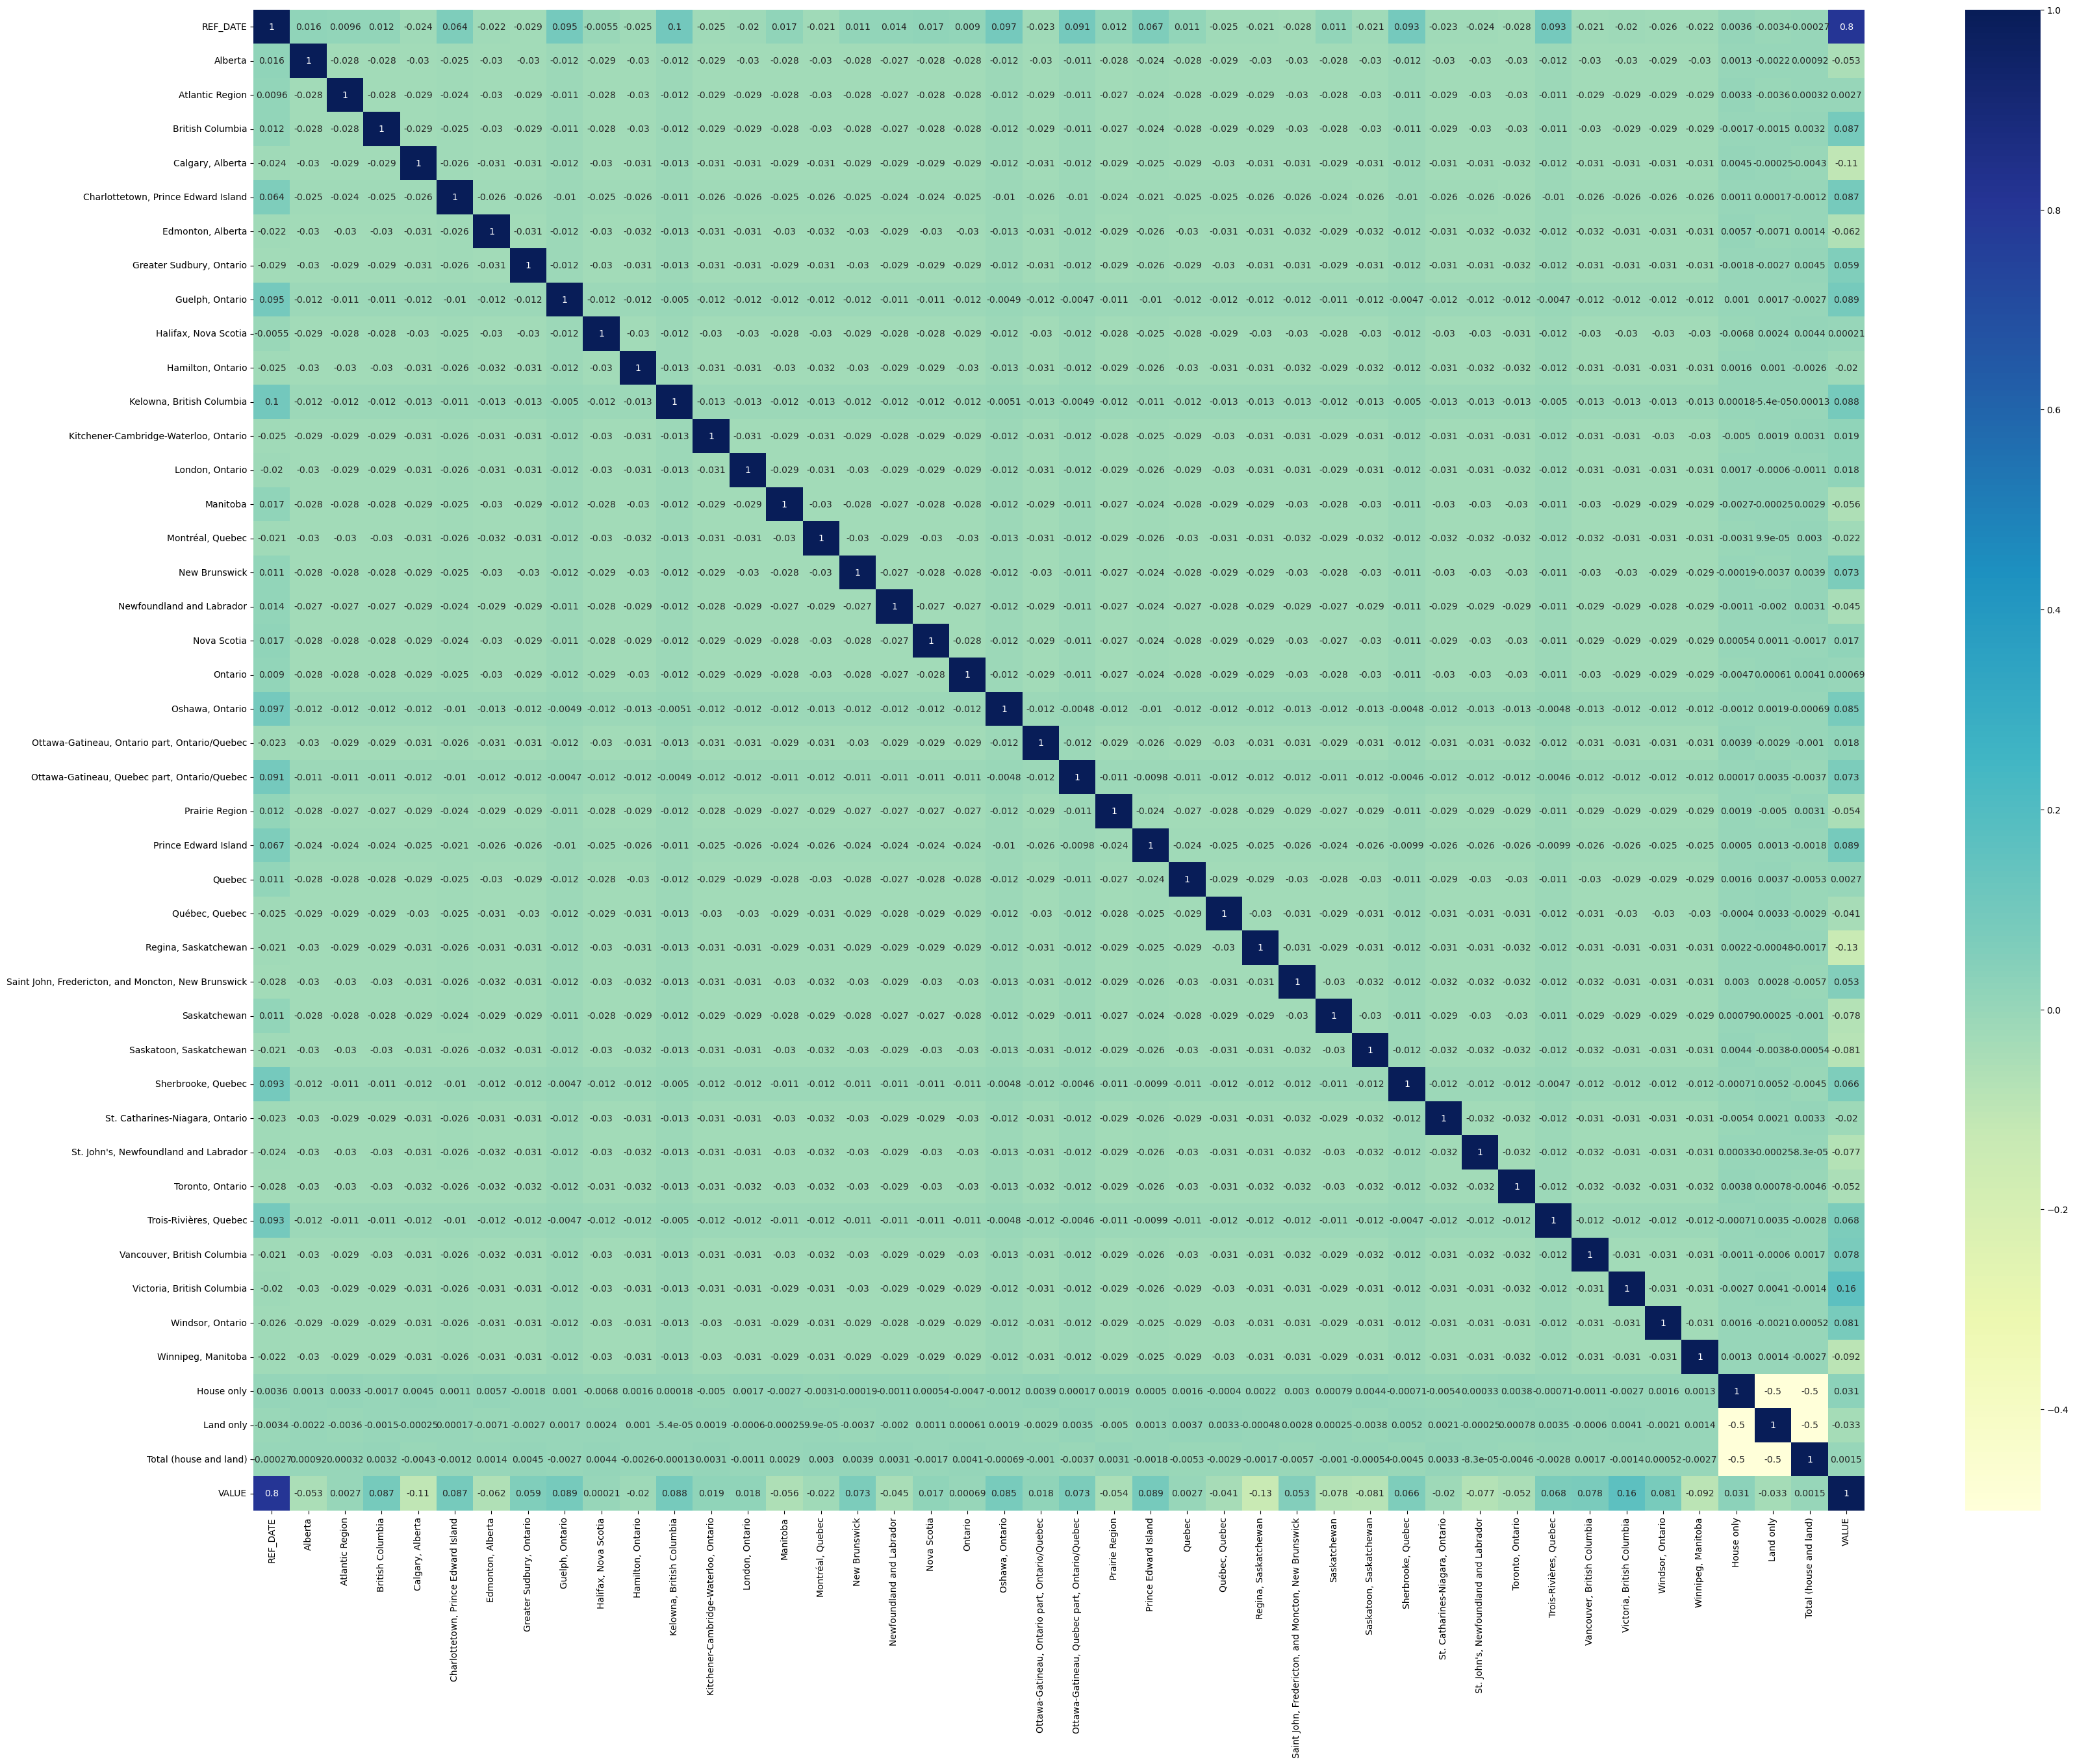

In [221]:
plt.figure(figsize=(40,30))
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

## Correlation Matrix

In [222]:
corr_matrix = housing_data.corr()
print(corr_matrix['VALUE'].sort_values(ascending=False))

VALUE                                                  1.000000
Victoria, British Columbia                             0.167480
British Columbia                                       0.089252
Guelph, Ontario                                        0.087619
Charlottetown, Prince Edward Island                    0.087519
Prince Edward Island                                   0.087519
Oshawa, Ontario                                        0.083156
Kelowna, British Columbia                              0.082686
Windsor, Ontario                                       0.082586
Vancouver, British Columbia                            0.076058
Ottawa-Gatineau, Quebec part, Ontario/Quebec           0.075818
New Brunswick                                          0.073242
Trois-Rivières, Quebec                                 0.069016
Sherbrooke, Quebec                                     0.068193
Greater Sudbury, Ontario                               0.060754
Saint John, Fredericton, and Moncton, Ne

/var/folders/03/bty7rrx95s357qd76vn6pqc80000gn/T/ipykernel_25260/2095488185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_data.corr()


/var/folders/03/bty7rrx95s357qd76vn6pqc80000gn/T/ipykernel_25260/1724501808.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(housing_data.corr(), fignum=f.number)


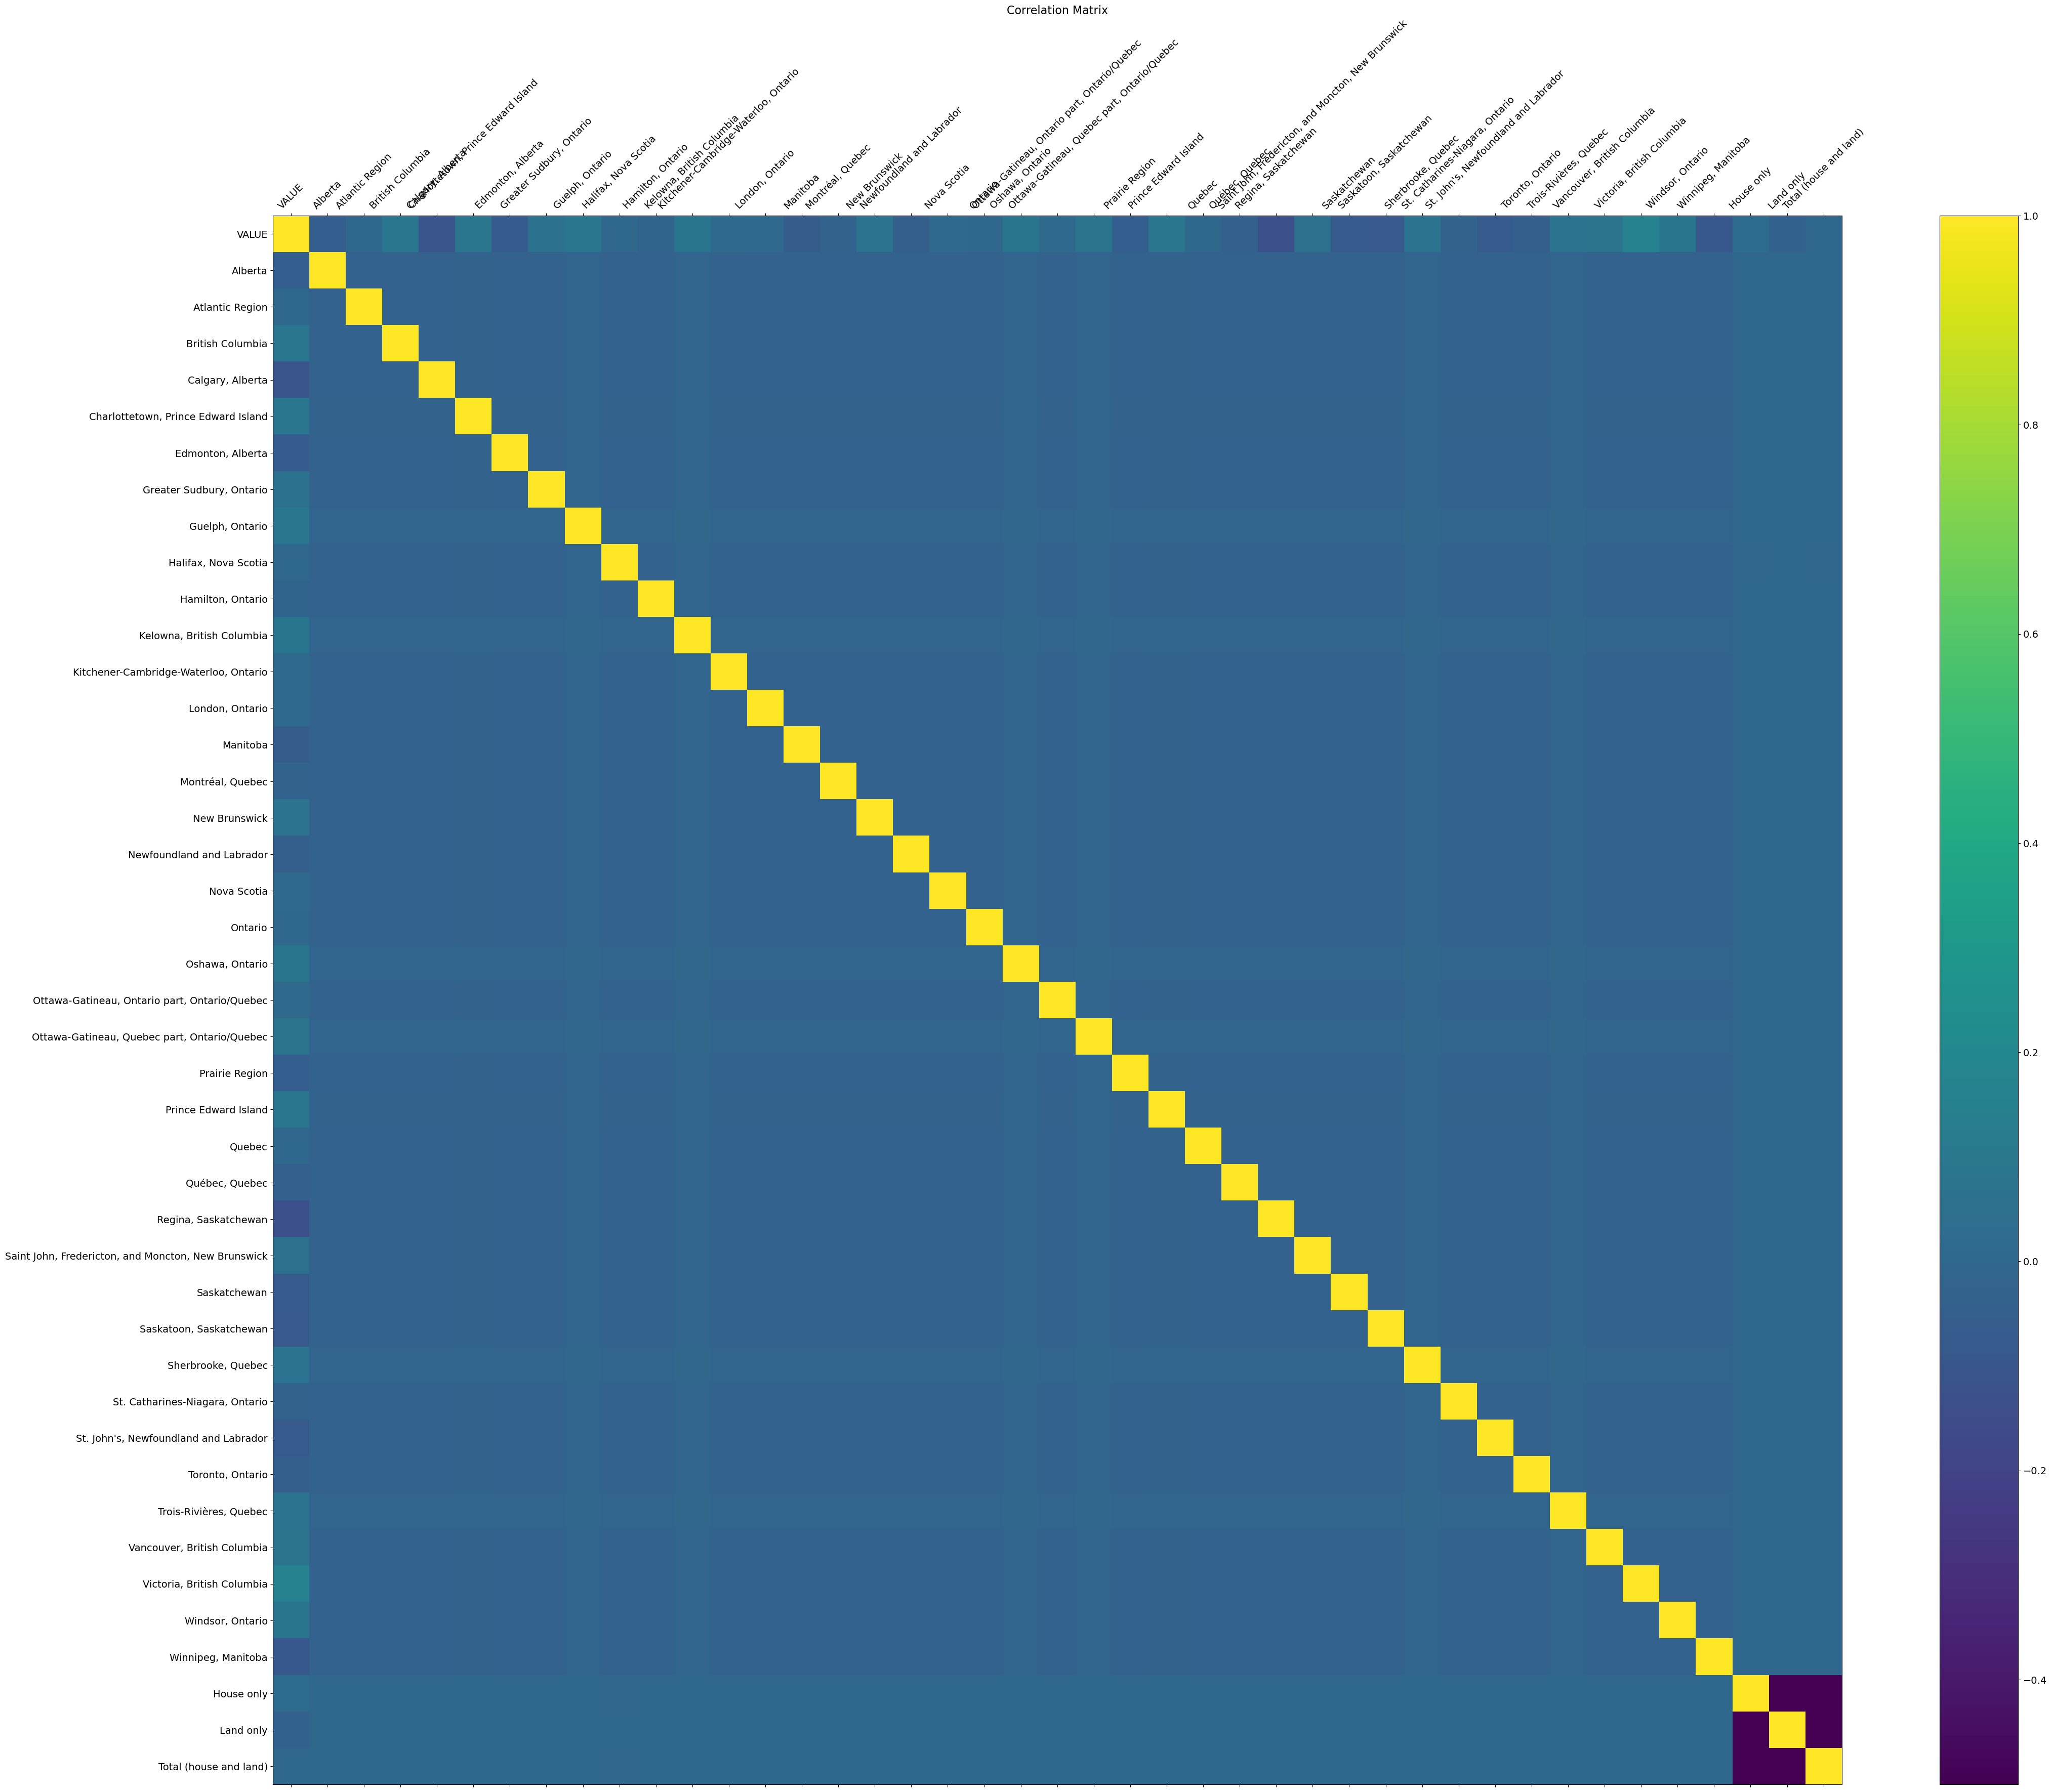

In [223]:
f = plt.figure(figsize=(50, 40))
plt.matshow(housing_data.corr(), fignum=f.number)
plt.xticks(range(housing_data.select_dtypes(['number']).shape[1]), housing_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(housing_data.select_dtypes(['number']).shape[1]), housing_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Linear Regression Model

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train, = train_data.drop(['VALUE'], axis = 1), train_data['VALUE']
X_train_s = scaler.fit_transform(X_train)

model = LinearRegression()

In [225]:
model.fit(X_train_s, y_train)

LinearRegression()

In [226]:
test_data = X_train.join(y_train)

In [227]:
test_data

,REF_DATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),VALUE
292,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,31.9
313,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,28.2
1196,1981,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,78.0
863,1981,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,32.5
182,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60918,2023,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,121.4
61228,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,121.1
60910,2023,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,132.7
60771,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,173.4


In [228]:
X_test, y_test = test_data.drop(['VALUE'], axis=1), test_data['VALUE']

In [229]:
X_test

,REF_DATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land)
292,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
313,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1196,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
863,1981,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
182,1981,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60918,2023,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
61228,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60910,2023,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
60771,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [230]:
X_test_s = scaler.transform(X_test)

In [231]:
r_sq= model.score(X_test_s, y_test)

In [232]:
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7822324635277358
intercept: 76.8163988910796
slope: [ 2.21824670e+01 -1.57646498e+00  4.55290261e-02  2.27376766e+00
 -2.16895678e+00  1.13217430e+00 -9.83876950e-01  2.38432318e+00
  4.39670497e-01  3.18367118e-01  1.83153732e-01  2.86487061e-01
  1.23227047e+00  1.10706590e+00 -1.67753296e+00  5.45696267e-02
  1.91352824e+00 -1.32816016e+00  2.77348178e-01  1.38804421e-02
  2.83522667e-01  1.17508834e+00  6.19521412e-02 -1.53654039e+00
  1.10528285e+00  2.92697526e-02 -3.77222814e-01 -2.89329908e+00
  2.21502377e+00 -2.14014839e+00 -1.51677597e+00 -1.47148392e-01
  1.49286026e-01 -1.35373153e+00 -5.80994187e-01 -1.07202665e-01
  2.73094624e+00  4.99257487e+00  2.91503121e+00 -1.80556694e+00
  2.14381344e+12  2.14627314e+12  2.14704226e+12]


## Random Forest Regression Model

In [233]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [234]:
forest.score(X_test_s, y_test)

0.9970594616640926

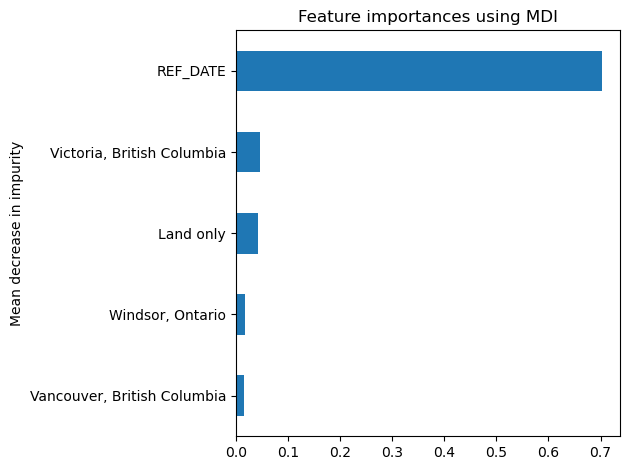

In [235]:
feature_names = X_test.columns
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

figsize=(60,50)
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:5][::-1].plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Splitting Complete Dataframe for Final Mode Training 

In [273]:
from sklearn.model_selection import train_test_split

X = merged_dummies.drop(['VALUE'], axis=1)
y = merged_dummies['VALUE']

In [274]:
X

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land)
0,1990,327448,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1990,327448,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1990,327448,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1990,327448,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1990,327448,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2021,36371910,0,1,0,0,0,0,0,0,0,0,1,0,0
1760,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,1,0
1761,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,0,1
1762,2021,36371910,0,1,0,0,0,0,0,0,0,0,1,0,0


In [275]:
y

0        45.4
1        46.7
2        40.6
3        45.4
4        46.7
        ...  
1759    123.7
1760    117.8
1761    124.1
1762    123.9
1763    117.9
Name: VALUE, Length: 1764, dtype: float64

In [276]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)

In [277]:
train_data = X_train.join(y_train)
train_data

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land),VALUE
357,2000,366136,0,0,0,0,1,0,0,0,0,0,0,0,1,49.5
139,1990,47432494,0,0,0,0,0,0,0,0,1,0,1,0,0,54.9
1706,2021,36161135,1,0,0,0,0,0,0,0,0,0,0,1,0,102.2
1497,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,0,1,117.8
326,2000,366136,0,0,0,0,1,0,0,0,0,0,0,1,0,45.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2015,10387949,0,0,0,0,0,0,0,0,0,1,1,0,0,103.2
1525,2021,2807686,0,0,0,1,0,0,0,0,0,0,1,0,0,110.2
1370,2015,44216499,0,1,0,0,0,0,0,0,0,0,0,1,0,99.2
642,2000,45723781,1,0,0,0,0,0,0,0,0,0,0,0,1,46.6


In [278]:
train_data.sort_values('REF_DATE', inplace=True)

<Axes: xlabel='REF_DATE'>

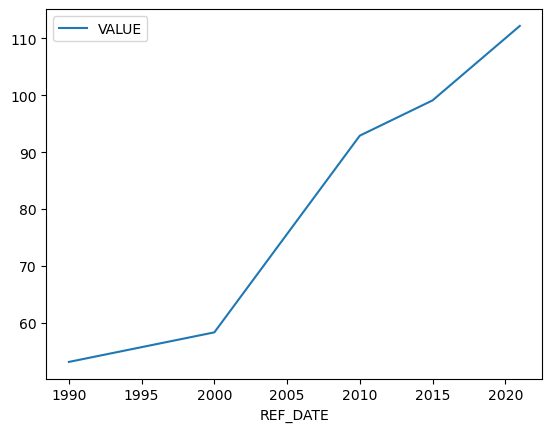

In [279]:
train_data[['REF_DATE', 'VALUE']].groupby('REF_DATE').median('VALUE').plot()

In [280]:
train_data['REF_DATE']=train_data['REF_DATE'].astype(int)

In [281]:
train_data

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land),VALUE
281,1990,34402687,1,0,0,0,0,0,0,0,0,0,0,1,0,36.5
41,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0,59.1
72,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1,80.9
59,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0,59.1
93,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2021,803990,0,0,0,0,1,0,0,0,0,0,0,1,0,99.9
1478,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,1,0,103.6
1491,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,0,1,117.8
1736,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,1,0,113.1


In [282]:
median_house_price_by_year = train_data.groupby('REF_DATE')['VALUE'].median().reset_index()

In [283]:
median_house_price_by_year

,REF_DATE,VALUE
0,1990,53.1
1,2000,58.3
2,2010,92.9
3,2015,99.1
4,2021,112.2


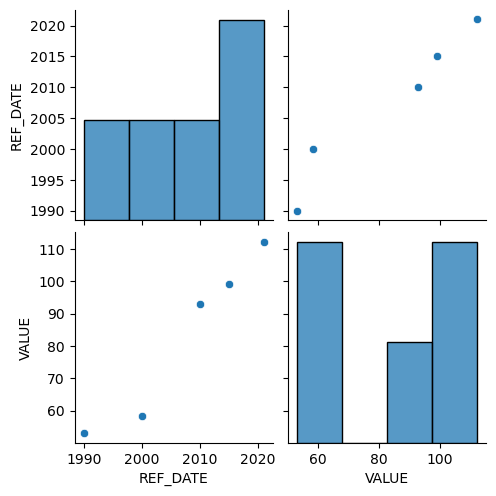

In [284]:
sns.pairplot(median_house_price_by_year)
plt.show()

array([[<Axes: title={'center': 'REF_DATE'}>,
        <Axes: title={'center': 'immigrants_total'}>,
        <Axes: title={'center': 'Alberta'}>,
        <Axes: title={'center': 'British Columbia'}>],
       [<Axes: title={'center': 'Manitoba'}>,
        <Axes: title={'center': 'New Brunswick'}>,
        <Axes: title={'center': 'Newfoundland and Labrador'}>,
        <Axes: title={'center': 'Nova Scotia'}>],
       [<Axes: title={'center': 'Ontario'}>,
        <Axes: title={'center': 'Prince Edward Island'}>,
        <Axes: title={'center': 'Quebec'}>,
        <Axes: title={'center': 'Saskatchewan'}>],
       [<Axes: title={'center': 'House only'}>,
        <Axes: title={'center': 'Land only'}>,
        <Axes: title={'center': 'Total (house and land)'}>,
        <Axes: title={'center': 'VALUE'}>]], dtype=object)

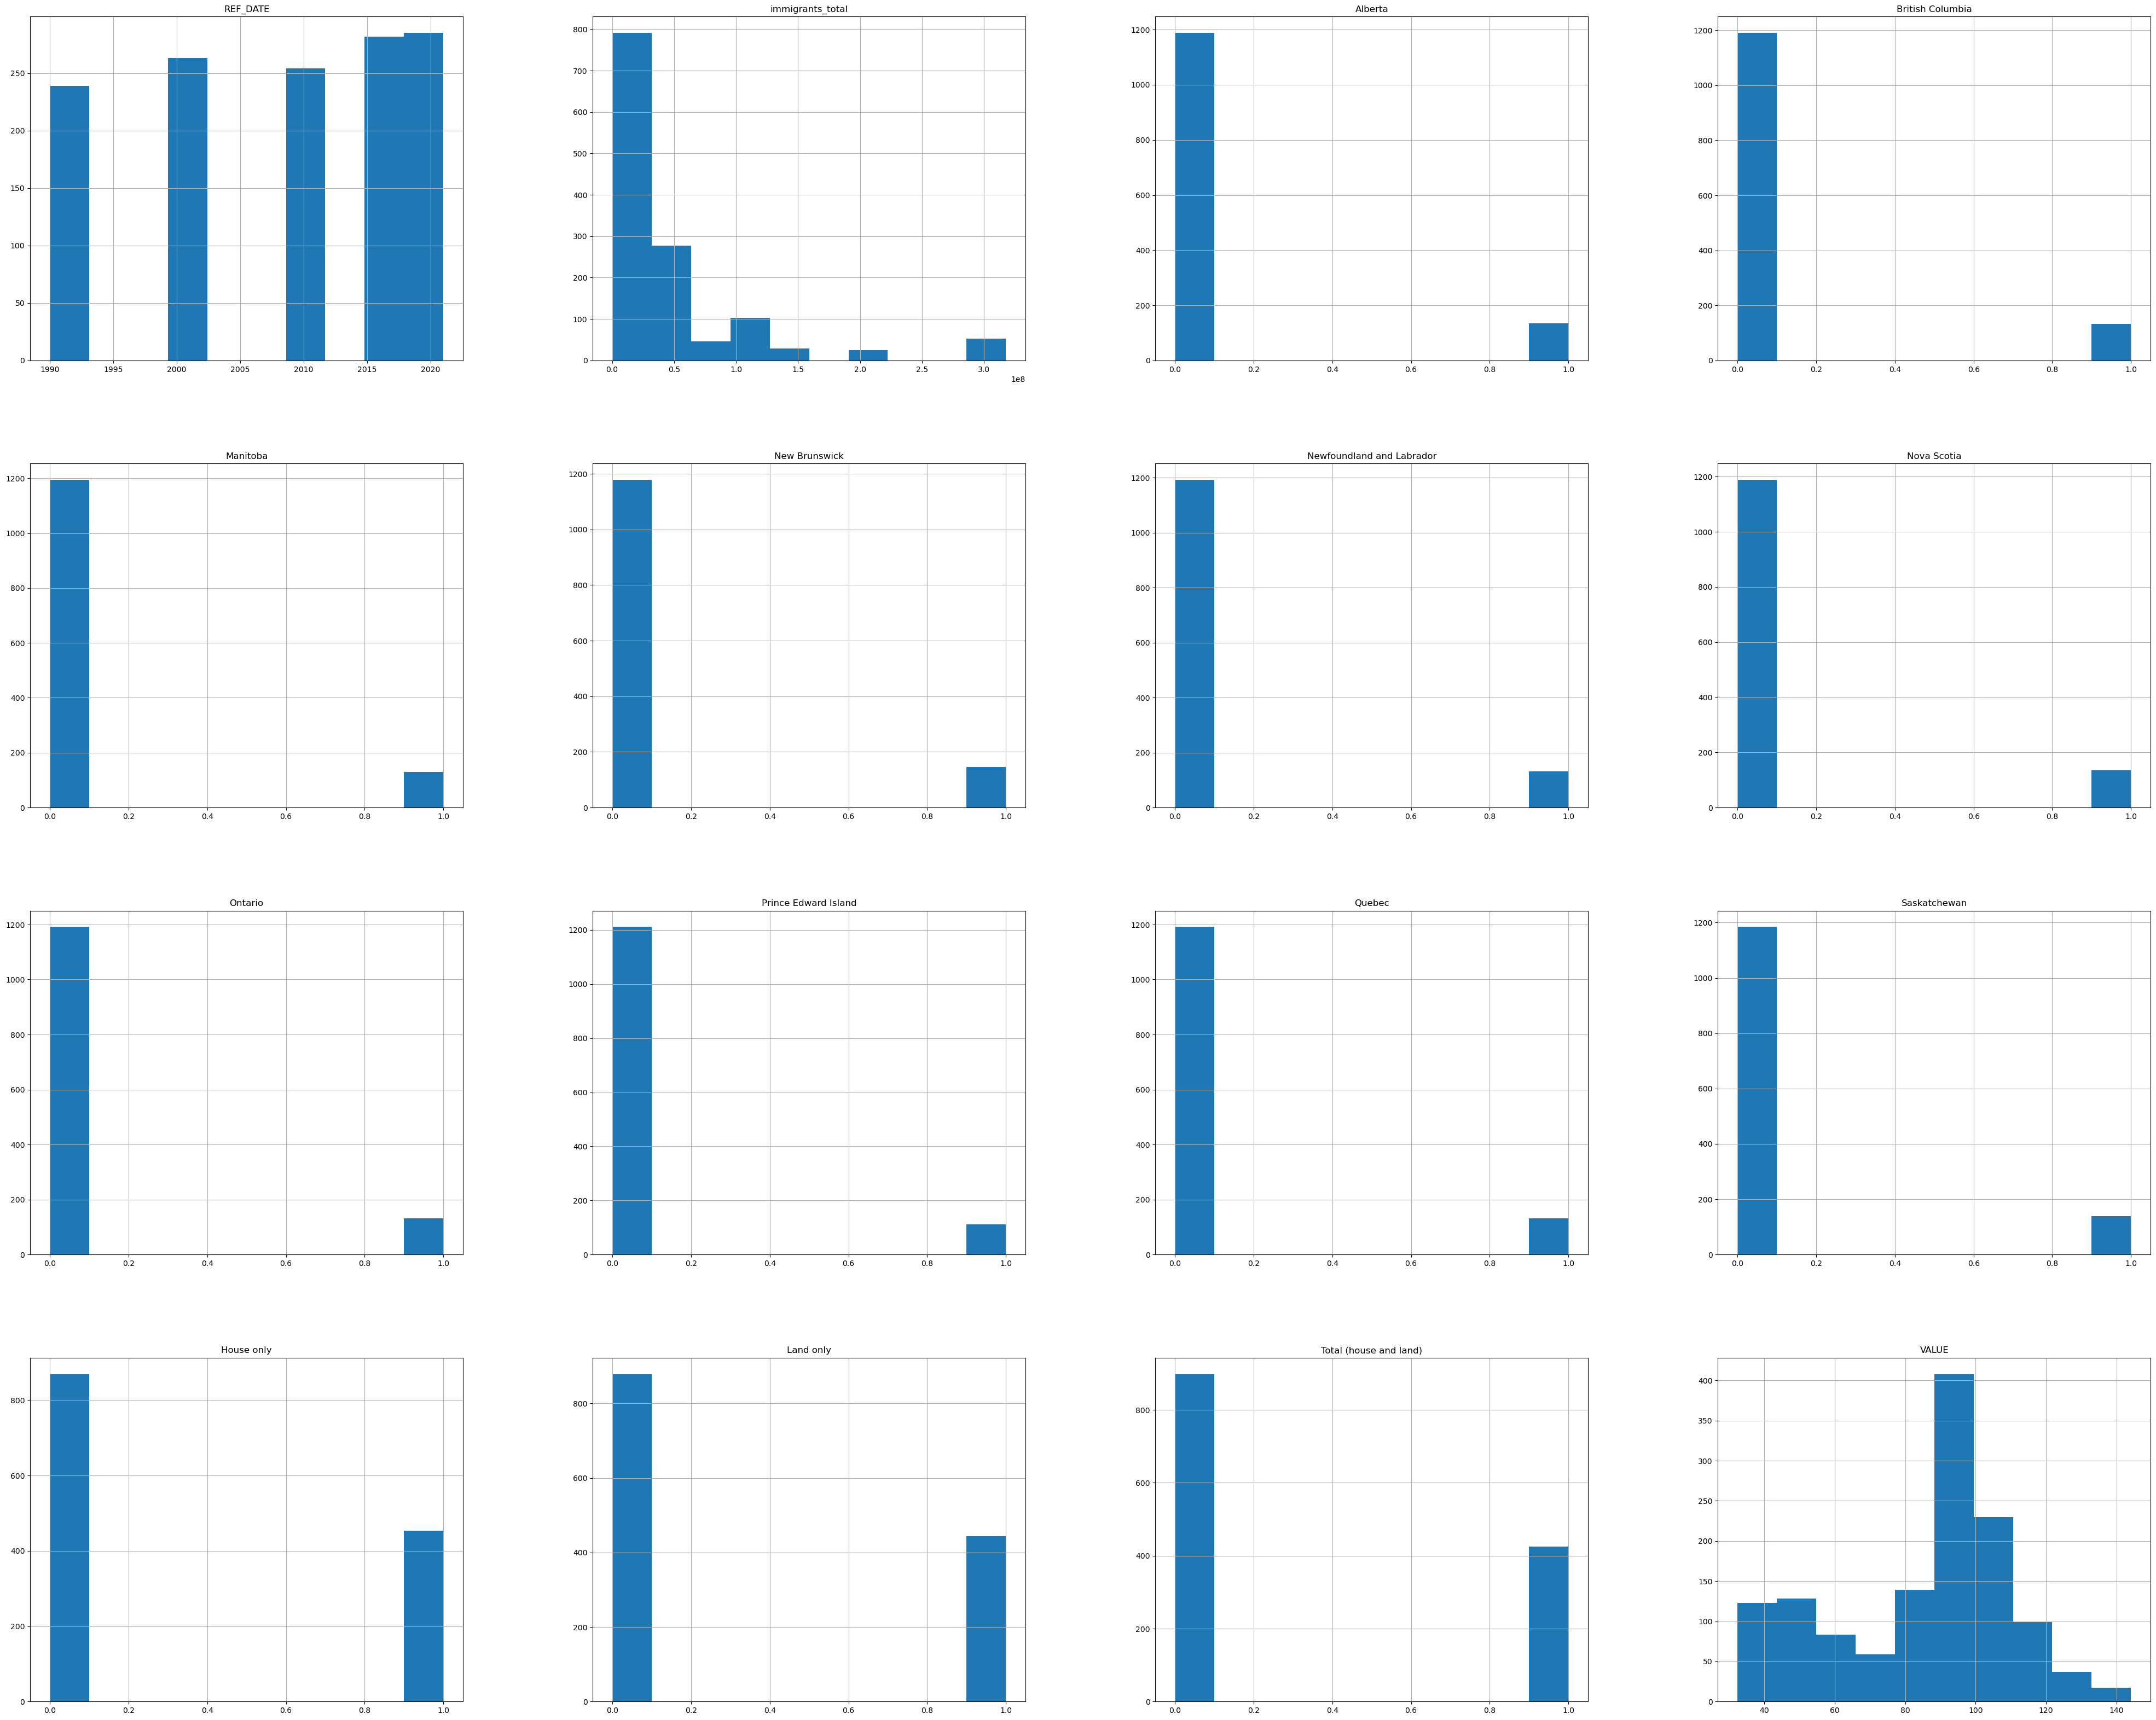

In [285]:
train_data.hist(figsize=(50,40))

In [286]:
train_data.corr()

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land),VALUE
REF_DATE,1.000000,-0.084684,-0.014580,-0.008989,-0.012305,-0.032404,-0.008198,-0.006563,-0.012296,0.115705,0.003204,-0.013565,-0.006258,-0.007562,0.014010,0.849651
immigrants_total,-0.084684,1.000000,0.034249,0.133033,-0.140016,-0.203108,-0.197144,-0.188987,0.809507,-0.181034,0.105862,-0.173611,0.003523,-0.000194,-0.003385,-0.049931
Alberta,-0.014580,0.034249,1.000000,-0.112697,-0.110803,-0.118269,-0.111752,-0.113636,-0.112225,-0.102517,-0.112225,-0.115502,-0.017496,0.019534,-0.001964,-0.123811
British Columbia,-0.008989,0.133033,-0.112697,1.000000,-0.109887,-0.117291,-0.110828,-0.112697,-0.111297,-0.101669,-0.111297,-0.114547,0.023083,0.023236,-0.046966,0.140737
Manitoba,-0.012305,-0.140016,-0.110803,-0.109887,1.000000,-0.115320,-0.108966,-0.110803,-0.109427,-0.099961,-0.109427,-0.112622,-0.006803,-0.001578,0.008513,-0.096927
New Brunswick,-0.032404,-0.203108,-0.118269,-0.117291,-0.115320,1.000000,-0.116308,-0.118269,-0.116800,-0.106696,-0.116800,-0.120211,-0.003864,0.006855,-0.003004,0.098369
Newfoundland and Labrador,-0.008198,-0.197144,-0.111752,-0.110828,-0.108966,-0.116308,1.000000,-0.111752,-0.110364,-0.100817,-0.110364,-0.113587,0.010906,-0.010524,-0.000446,-0.089233
Nova Scotia,-0.006563,-0.188987,-0.113636,-0.112697,-0.110803,-0.118269,-0.111752,1.000000,-0.112225,-0.102517,-0.112225,-0.115502,-0.017496,-0.006907,0.024773,0.016463
Ontario,-0.012296,0.809507,-0.112225,-0.111297,-0.109427,-0.116800,-0.110364,-0.112225,1.000000,-0.101244,-0.110831,-0.114068,-0.001578,-0.006940,0.008622,0.009358
Prince Edward Island,0.115705,-0.181034,-0.102517,-0.101669,-0.099961,-0.106696,-0.100817,-0.102517,-0.101244,1.000000,-0.101244,-0.104200,0.003238,0.008123,-0.011507,0.162195


<Axes: >

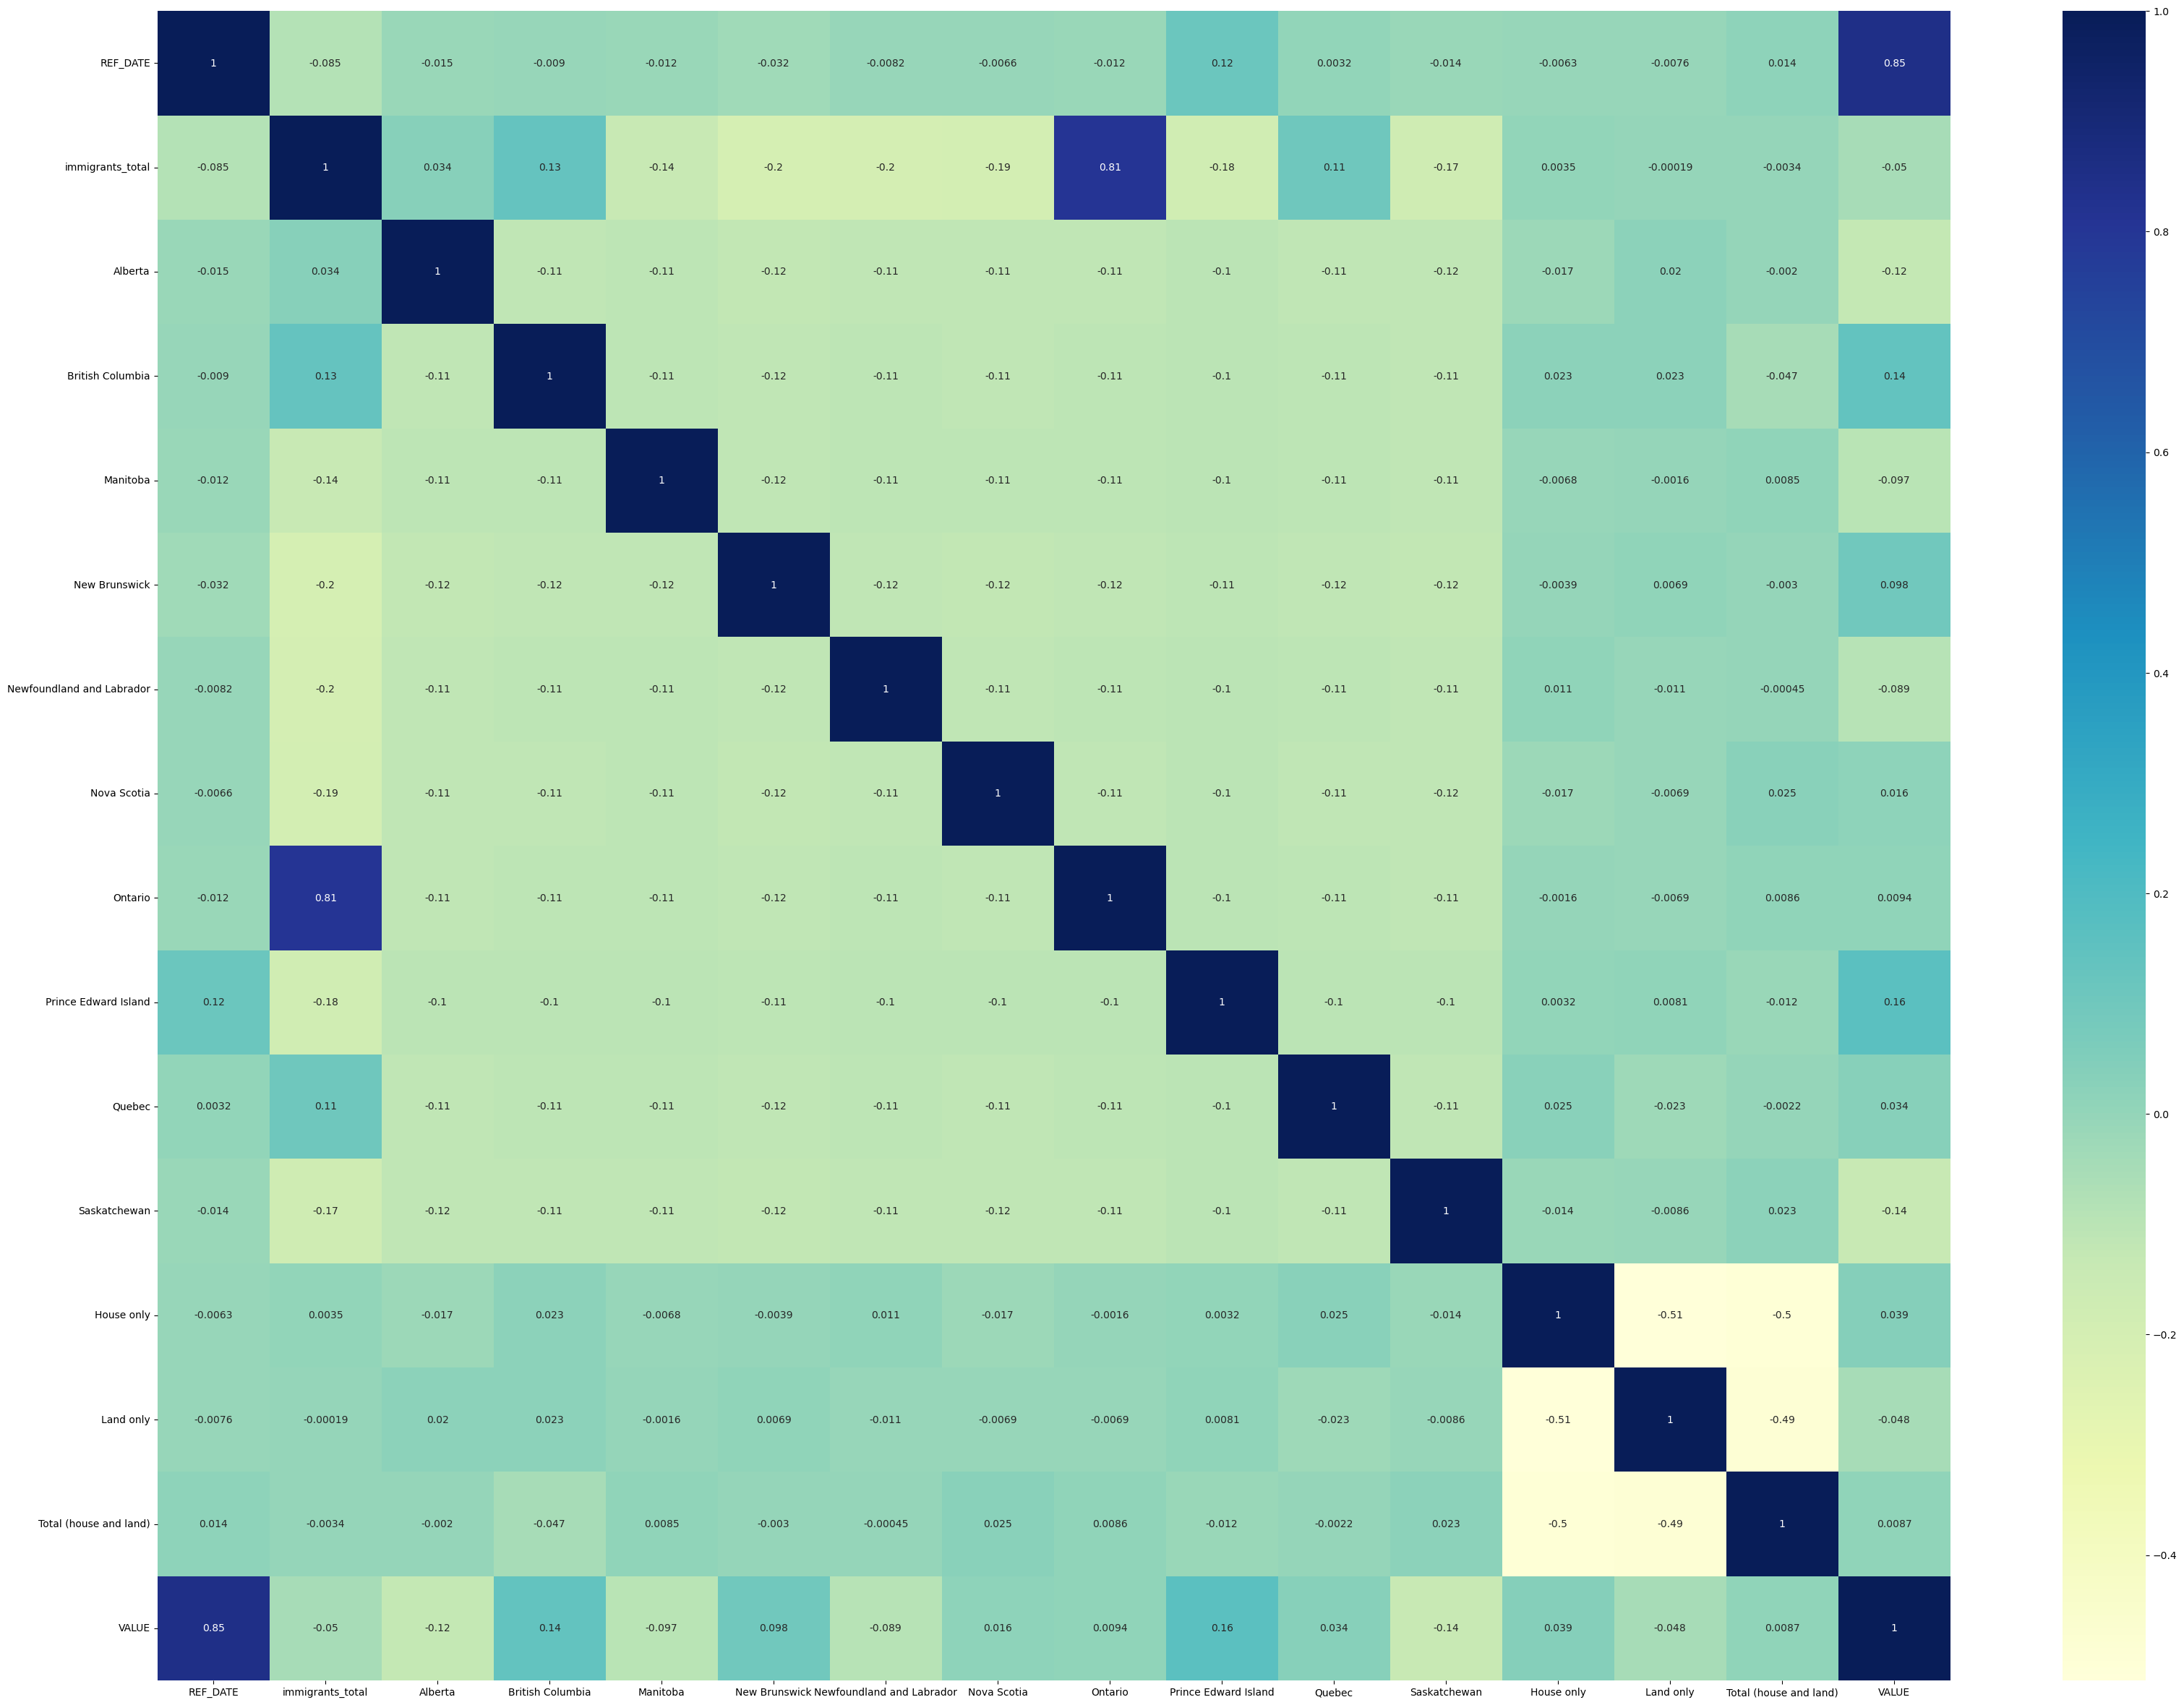

In [287]:
plt.figure(figsize=(40,30))
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

## Correlation Matrix for Complete Data

In [304]:
corr_matrix = merged_dummies.corr()
print(corr_matrix['VALUE'].sort_values(ascending=False))

VALUE                        1.000000
REF_DATE                     0.850227
Prince Edward Island         0.158349
British Columbia             0.144859
New Brunswick                0.110774
House only                   0.030350
Quebec                       0.019390
Nova Scotia                  0.016812
Ontario                      0.012203
Total (house and land)       0.011337
Land only                   -0.041686
immigrants_total            -0.045927
Newfoundland and Labrador   -0.088369
Manitoba                    -0.106005
Alberta                     -0.111999
Saskatchewan                -0.140897
Name: VALUE, dtype: float64


In [305]:
corr_matrix.to_csv('correlation_matrix.csv')

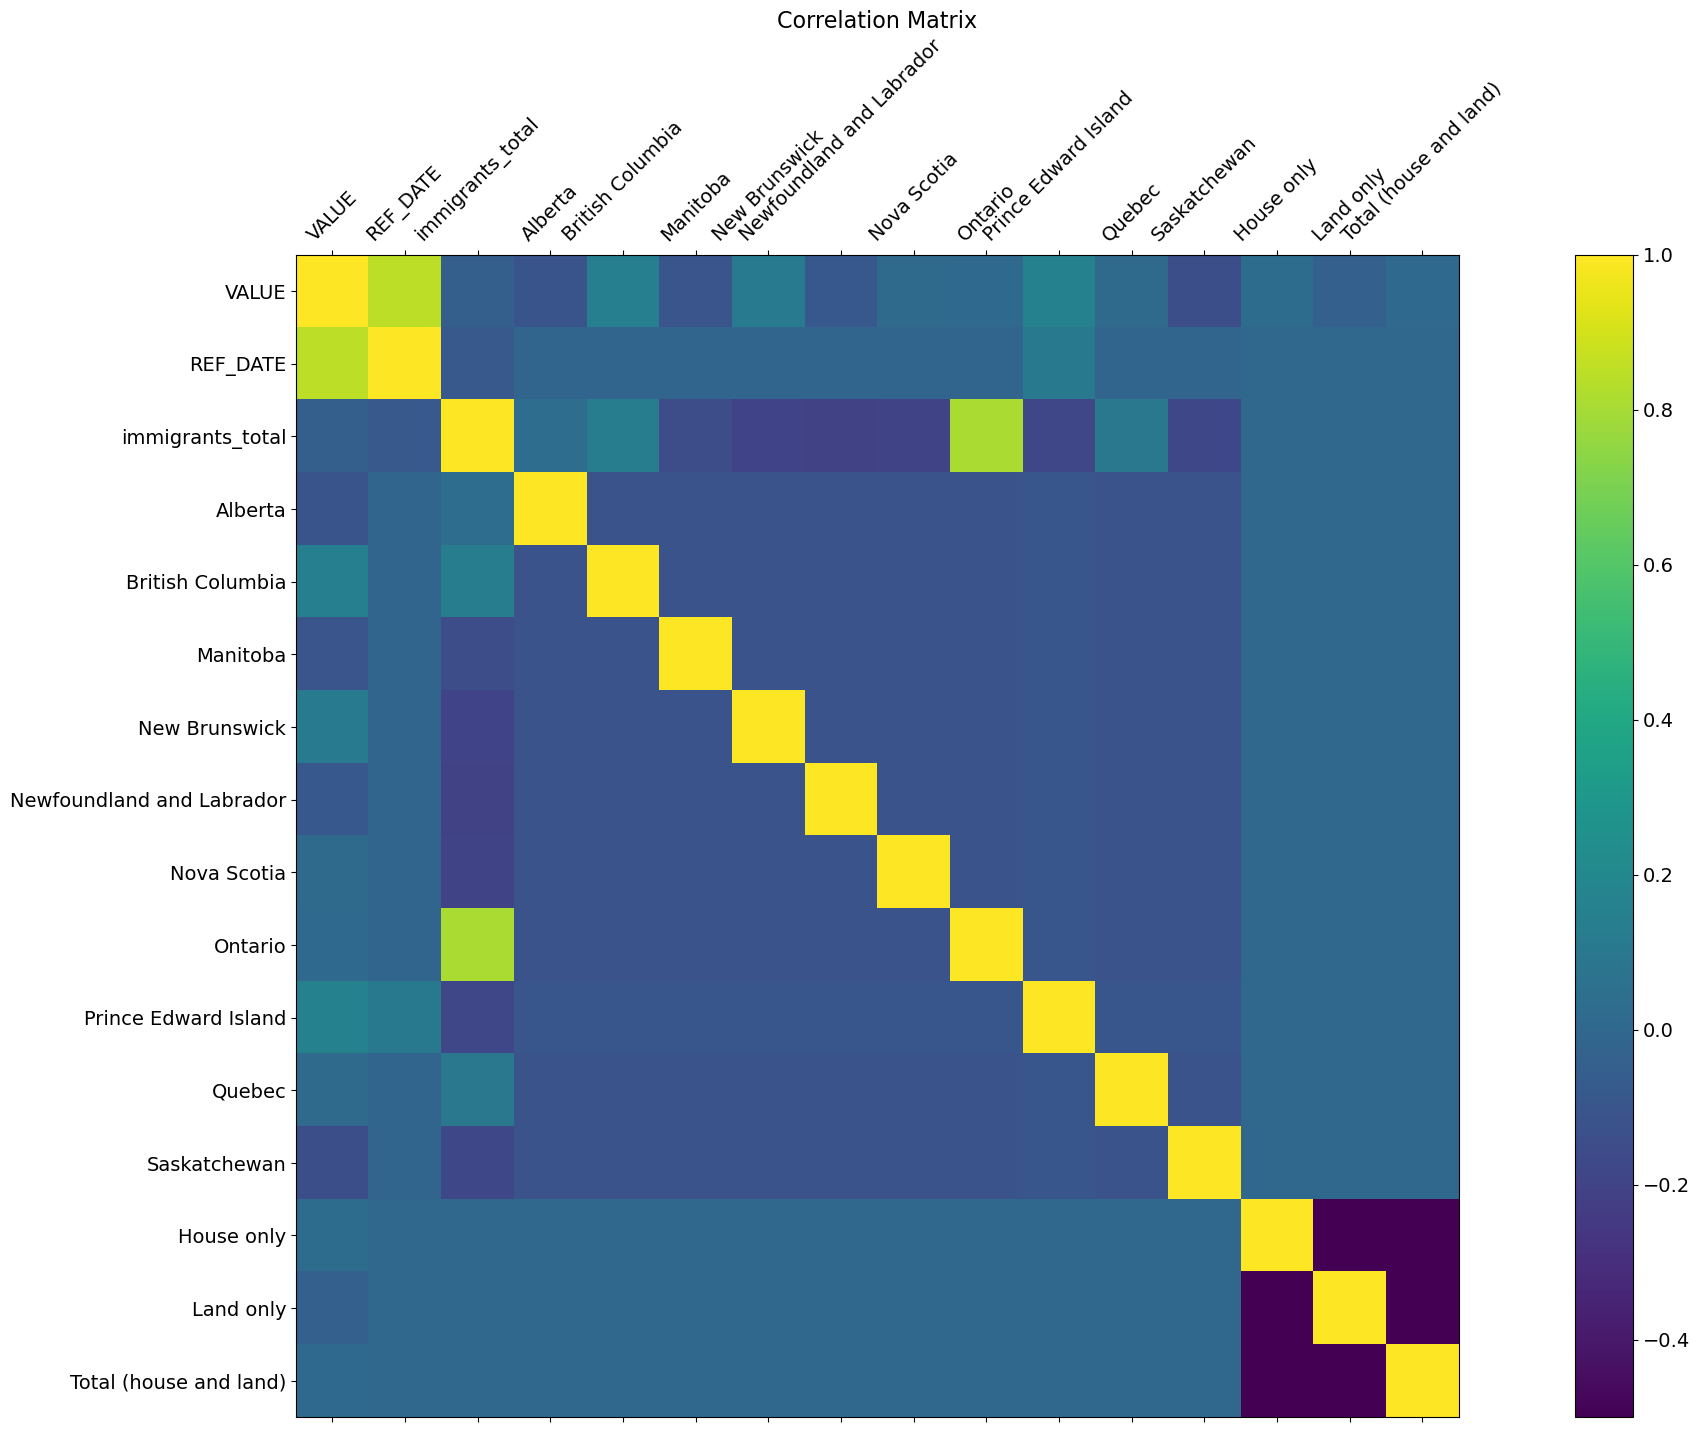

In [333]:
f = plt.figure(figsize=(30, 15))
plt.matshow(merged_dummies.corr(), fignum=f.number)
plt.xticks(range(merged_dummies.select_dtypes(['number']).shape[1]), merged_dummies.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(merged_dummies.select_dtypes(['number']).shape[1]), merged_dummies.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Linear Regression Model

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train, = train_data.drop(['VALUE'], axis = 1), train_data['VALUE']
X_train_s = scaler.fit_transform(X_train)

model = LinearRegression()

In [332]:
model.fit(X_train, y_train)

LinearRegression()

In [308]:
X_train

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land)
281,1990,34402687,1,0,0,0,0,0,0,0,0,0,0,1,0
41,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0
72,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1
59,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0
93,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2021,803990,0,0,0,0,1,0,0,0,0,0,0,1,0
1478,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,1,0
1491,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,0,1
1736,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,1,0


In [310]:
y_train=y_train*1000

In [294]:
test_data = X_train.join(y_train)

In [295]:
test_data

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land),VALUE
281,1990,34402687,1,0,0,0,0,0,0,0,0,0,0,1,0,36.5
41,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0,59.1
72,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1,80.9
59,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0,59.1
93,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2021,803990,0,0,0,0,1,0,0,0,0,0,0,1,0,99.9
1478,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,1,0,103.6
1491,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,0,1,117.8
1736,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,1,0,113.1


In [296]:
X_test, y_test = test_data.drop(['VALUE'], axis=1), test_data['VALUE']

In [297]:
X_test

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land)
281,1990,34402687,1,0,0,0,0,0,0,0,0,0,0,1,0
41,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0
72,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1
59,1990,2046035,0,0,0,0,0,1,0,0,0,0,0,1,0
93,1990,990300,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2021,803990,0,0,0,0,1,0,0,0,0,0,0,1,0
1478,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,1,0
1491,2021,3818993,0,0,0,0,0,1,0,0,0,0,0,0,1
1736,2021,36371910,0,1,0,0,0,0,0,0,0,0,0,1,0


In [298]:
X_test_s = scaler.transform(X_test)

In [299]:
r_sq= model.score(X_test_s, y_test)

In [300]:
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8039701687592993
intercept: 84.89399504939298
slope: [ 2.11452688e+01 -2.27113173e+00  8.49856889e+12  8.44247913e+12
  8.32851770e+12  8.77056035e+12  8.38579942e+12  8.49856889e+12
  8.41421376e+12  7.81541020e+12  8.41421376e+12  8.60902454e+12
  6.01436975e+13  5.98188738e+13  5.91541125e+13]


In [328]:
y_train.reset_index().drop('index', axis=1)
# pd.DataFrame(X_train_s, columns=X_train.columns)

,REF_DATE,immigrants_total,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,House only,Land only,Total (house and land)
0,-1.635955,-0.104118,2.966479,-0.334312,-0.328695,-0.350842,-0.331511,-0.337100,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,1.407029,-0.687949
1,-1.635955,-0.573702,-0.337100,-0.334312,-0.328695,-0.350842,-0.331511,2.966479,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,1.407029,-0.687949
2,-1.635955,-0.589023,-0.337100,-0.334312,-0.328695,2.850287,-0.331511,-0.337100,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,-0.710718,1.453596
3,-1.635955,-0.573702,-0.337100,-0.334312,-0.328695,-0.350842,-0.331511,2.966479,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,1.407029,-0.687949
4,-1.635955,-0.589023,-0.337100,-0.334312,-0.328695,2.850287,-0.331511,-0.337100,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,-0.710718,1.453596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1.207674,-0.591727,-0.337100,-0.334312,-0.328695,-0.350842,3.016494,-0.337100,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,1.407029,-0.687949
1319,1.207674,-0.547971,-0.337100,-0.334312,-0.328695,-0.350842,-0.331511,2.966479,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,1.407029,-0.687949
1320,1.207674,-0.547971,-0.337100,-0.334312,-0.328695,-0.350842,-0.331511,2.966479,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,-0.710718,1.453596
1321,1.207674,-0.075540,-0.337100,2.991215,-0.328695,-0.350842,-0.331511,-0.337100,-0.332913,-0.304114,-0.332913,-0.342635,-0.722800,1.407029,-0.687949


In [329]:
df = X_test

x = pd.DataFrame(X_train_s, columns=X_train.columns)
y = y_train.reset_index().drop('index', axis=1) * 1000

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     411.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:05:49   Log-Likelihood:                -14213.
No. Observations:                1323   AIC:                         2.845e+04
Df Residuals:                    1309   BIC:                         2.853e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Random Forest Regression Model

In [301]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [302]:
forest.score(X_test_s, y_test)

0.9938918793919955

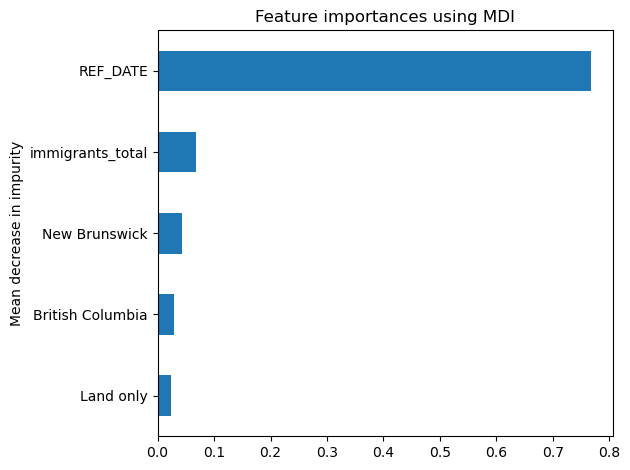

In [303]:
feature_names = X_test.columns
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

figsize=(60,50)
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:5][::-1].plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()